In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in Data

In [7]:
df = pd.read_csv("AGGREGATE_NHL_PBP_DATA.csv", index_col = False)

In [26]:
df.head(5)

,Player_Id,Player,Assists,Shifts,BLOCK,GOAL (BACKHAND),GOAL (DEFLECTED),GOAL (SLAP SHOT),GOAL (SNAP SHOT),GOAL (TIP-IN),GOAL (WRAP-AROUND),GOAL (WRIST SHOT),HIT,PENL (FIGHTING),PENL (OTHER)
0,8465009,ZDENO CHARA,12.0,1730,90.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,125.0,6.0,20.0
1,8466138,JOE THORNTON,5.0,530,10.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,20.0,0.0,5.0
2,8469455,JASON SPEZZA,14.0,1208,24.0,0.0,1.0,3.0,1.0,0.0,0.0,7.0,39.0,0.0,14.0
3,8470281,DUNCAN KEITH,24.0,1920,143.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,30.0,0.0,13.0
4,8470600,RYAN SUTER,28.0,2387,99.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,51.0,0.0,21.0


Player_Id: Unique identifier for every player

Assists: Number of primary and secondary assists over a season +playoffs

Shifts: Number of shifts over a season +playoffs

BLOCK: Number of blocks over a season +playoffs

GOAL (BACKHAND): Number of goals scored on the backhand over a season +playoffs

GOAL (DEFLECTED): Number of deflected goals over a season +playoffs

GOAL (SLAP SHOT): Number of slap shot goals over a season +playoffs

GOAL (SNAP SHOT): Number of snap shot goals over a season +playoffs

GOAL (TIP-IN): Number of tip-in goals over a season +playoffs

GOAL (WRAP-AROUND): Number of wrap-around goals over a season +playoffs

GOAL (WRIST SHOT): Number of wrist shot goals over a season +playoffs

HIT: Number of hits over a season +playoffs

PENL (FIGHTING): Number of 'fighting related' penalties over a season +playoffs, including - 'Fighting (maj)', 'Instigator(2 min)','Instigator - Misconduct(10 min)', 'Aggressor(10 min)'

PEN (OTHER): Number of all other penalties (excluding the above) over a season +playoffs
 

In [22]:
df.loc[:, df.columns != 'Player_Id'].describe()

,Assists,Shifts,BLOCK,GOAL (BACKHAND),GOAL (DEFLECTED),GOAL (SLAP SHOT),GOAL (SNAP SHOT),GOAL (TIP-IN),GOAL (WRAP-AROUND),GOAL (WRIST SHOT),HIT,PENL (FIGHTING),PENL (OTHER)
count,849.000000,1006.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.00000,987.000000,987.000000,987.000000
mean,17.261484,1063.338966,38.596758,0.776089,0.273556,0.816616,1.295846,0.811550,0.038501,4.22695,67.225937,0.721378,8.976697
std,16.306323,769.192378,40.592637,1.387979,0.660490,1.645514,2.066740,1.484521,0.207704,5.59023,62.729195,1.804991,8.132427
min,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,5.000000,258.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,16.000000,0.000000,2.000000
50%,13.000000,1102.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000,51.000000,0.000000,7.000000
75%,24.000000,1714.500000,51.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,6.00000,99.000000,1.000000,14.000000
max,102.000000,2964.000000,229.000000,9.000000,5.000000,17.000000,15.000000,19.000000,2.000000,33.00000,400.000000,14.000000,44.000000


A few interesting takeaways:

- The most popular goal, on average,  is the wrist shot (avg = 4.2 per player) followed by snap shot (avg = 1.29 per player) and the slap shot (avg = 0.81 per player).

- Wrist shot goals have a really high standard deviation (5.59) in comparison to the other types of goals, indicating a high amount variability for this number. This is interesting as it implies that wrist shots are more variable than other kinds of shots and/or are more skill dependent. Conventionally, one would think this to be true for slap shots moreso.

- The average NHL player does not participate in a single fight throughout the NHL season + playoffs, and its only the upper 75% who participate in 1 or more fights. I'd be interested to see this stat compared over years (perhaps I will do this in another project).

- One player recorded 400 hits in the 2021/2022 season + playoffs - what an incredible outlier in comparison to to the 75% of 99 hits

- Similarly to the hits total, one player recorded 102 assists over the season +playoffs which is 4 times more than the 75%



# Exploratory Analysis

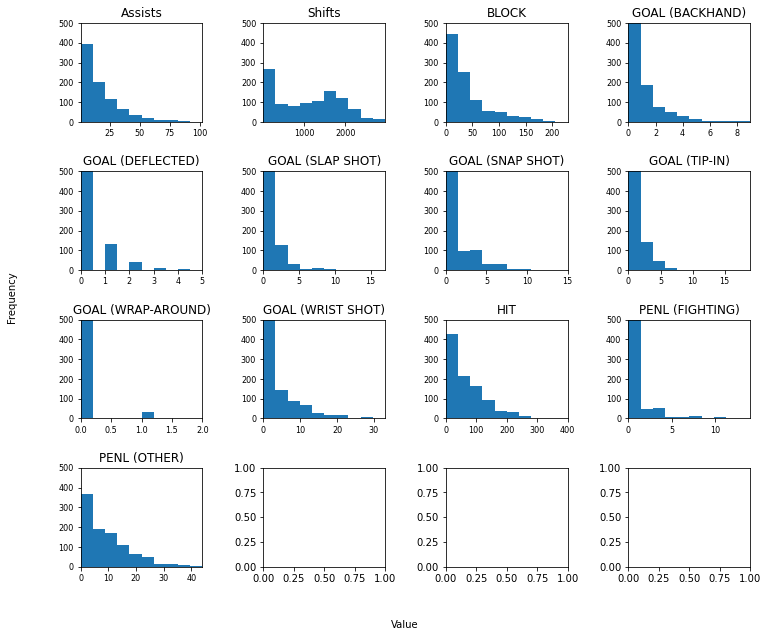

In [101]:
cols = df.columns[2:]
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(12, 10))

# Create a histogram for each column of data
for i, col in enumerate(cols):
    if i < len(axs.flatten()) and i < len(cols):
        ax = axs[i//4, i%4]
        ax.hist(df[col])
        ax.set_title(f'{col}')


        # Adjust the size of the subplots
        ax.set_xlim([df[col].min(), df[col].max()])
        ax.set_ylim([0, 500])
        ax.tick_params(axis='both', which='major', labelsize=8)

# Add a common y label
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical')

# Add a common x label
fig.text(0.5, 0.04, 'Value', ha='center')

# Adjust the spacing between the subplots
fig.subplots_adjust(hspace=0.5, wspace=0.5)

plt.show()

Unsurprisingly, all of the data's features are exponentialy distributed with a single exception: shifts. Unlike, the other features which are all memoryless (e.g. the number of goals you get is not dependent on how much time has elapsed since your previous goal), the frequency of shifts you get is dependent on your role within the team. Defenceman, for example, will normally get more shifts than players playing on the fourth, third, or second line. However, there are fewer defencemen on the team than other positions which is why our normal distribution is skewed so ehavily to the left

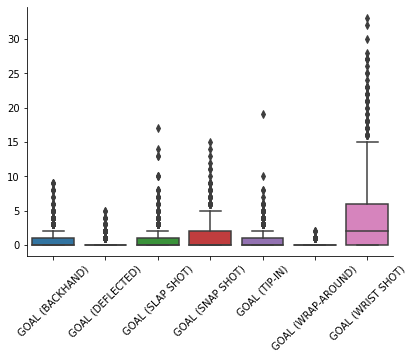

In [153]:
# create a catplot with boxplots showcasing
ax = sns.catplot(data=df.loc[:, df.columns.str.startswith('GOAL')], kind="box", height=4, aspect=1.5)
ax.set_xticklabels(rotation=45, fontsize=10)


plt.show()

# 